# Spam Email Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('emails.csv')

# Data Understanding

In [3]:
data.shape

(5172, 3002)

In [4]:
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [5]:
data.tail()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1
5171,Email 5172,22,24,5,1,6,5,148,8,2,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [7]:
data.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


# Pre-Processing

In [8]:
data.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

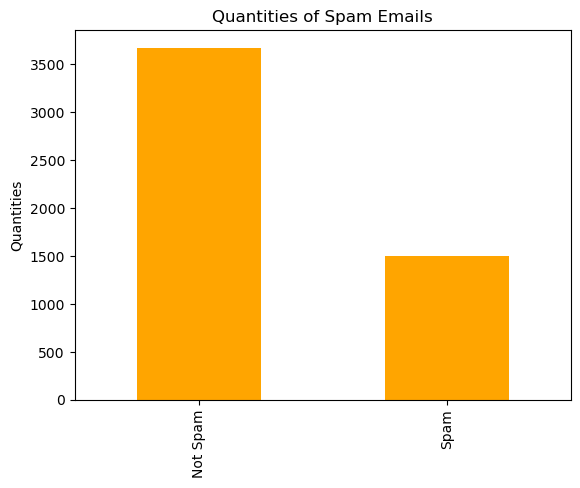

In [9]:
contagem_valores = data['Prediction'].value_counts()
contagem_valores.plot(kind='bar', color='orange')
plt.xlabel('')
plt.ylabel('Quantities')
plt.title('Quantities of Spam Emails')

plt.xticks([0,1],['Not Spam','Spam'])
plt.show()

In [10]:
data.drop('Email No.',axis=1,inplace=True)

# Model Building

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [12]:
x = data.drop('Prediction',axis=1)
y = data['Prediction']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\khali\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
y_pred = model.predict(x_test)

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       739
           1       0.93      0.97      0.95       296

    accuracy                           0.97      1035
   macro avg       0.96      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035



In [17]:
accuracy = accuracy_score(y_test,y_pred)
logistic_accuracy = accuracy*100
logistic_accuracy

97.19806763285024

### Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB
model_2 = GaussianNB()
model_2.fit(x_train,y_train)
y_pred2 = model_2.predict(x_test)

In [19]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       739
           1       0.87      0.96      0.91       296

    accuracy                           0.95      1035
   macro avg       0.93      0.95      0.94      1035
weighted avg       0.95      0.95      0.95      1035



In [20]:
accuracy2 = accuracy_score(y_test, y_pred2)
NaiveBayes_accuracy=accuracy2 * 100
NaiveBayes_accuracy

94.78260869565217

### K-Nearest Neighbours

In [21]:
from sklearn.neighbors import KNeighborsClassifier
model_3 = KNeighborsClassifier(n_neighbors=10)
model_3.fit(x_train,y_train)
y_pred3 = model.predict(x_test)

In [22]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       739
           1       0.93      0.97      0.95       296

    accuracy                           0.97      1035
   macro avg       0.96      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035



In [23]:
accuracy3 = accuracy_score(y_test, y_pred3)
KNeighborsClassifier_accuracy=accuracy3 * 100
KNeighborsClassifier_accuracy

97.19806763285024

### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
model_4 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
model_4.fit(x_train,y_train)
y_pred4 = model_4.predict(x_test)

In [25]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       739
           1       0.88      0.57      0.69       296

    accuracy                           0.86      1035
   macro avg       0.86      0.77      0.80      1035
weighted avg       0.86      0.86      0.84      1035



In [26]:
accuracy4 = accuracy_score(y_test, y_pred4)
DecisionTree_accuracy=accuracy4 * 100
DecisionTree_accuracy

85.5072463768116

In [27]:
print(f"Logistic Regression Accuracy: {logistic_accuracy:.2f}%")
print(f"Naive Bayes Accuracy: {NaiveBayes_accuracy:.2f}%")
print(f"K-Nearest Neighbours Accuracy: {KNeighborsClassifier_accuracy:.2f}%")
print(f"Decision Tree Accuracy: {DecisionTree_accuracy:.2f}%")

Logistic Regression Accuracy: 97.20%
Naive Bayes Accuracy: 94.78%
K-Nearest Neighbours Accuracy: 97.20%
Decision Tree Accuracy: 85.51%


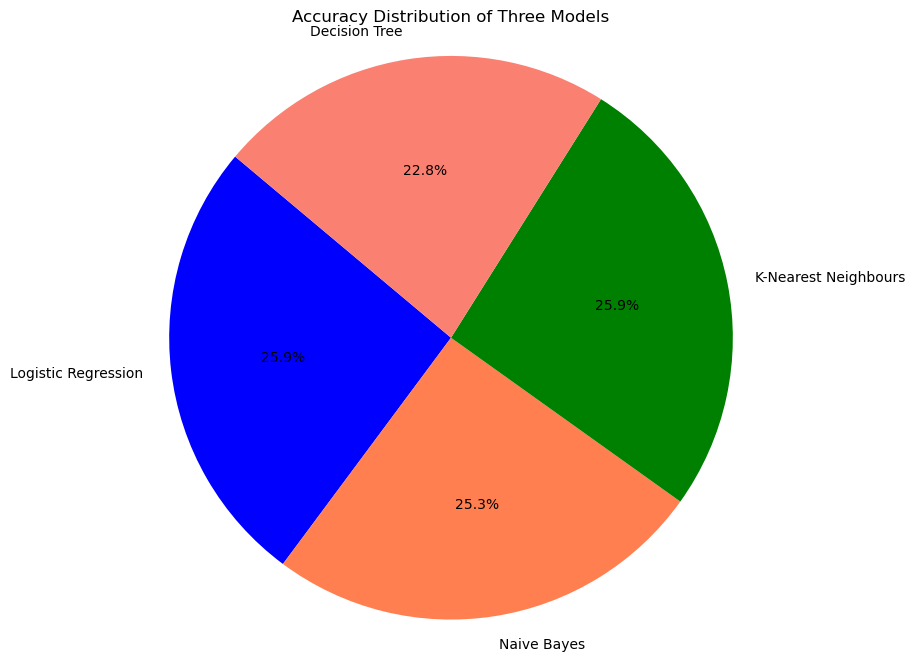

In [28]:
accuracies = [logistic_accuracy, NaiveBayes_accuracy, KNeighborsClassifier_accuracy, DecisionTree_accuracy]
model_names = ["Logistic Regression", "Naive Bayes", "K-Nearest Neighbours", "Decision Tree"]
plt.figure(figsize=(8, 8))
plt.pie(accuracies, labels=model_names, autopct='%1.1f%%', startangle=140, colors=['blue', 'coral', 'green', 'salmon', 'steelblue'])
plt.title("Accuracy Distribution of Three Models")
plt.axis('equal') 
plt.show()

#### In our analysis, we discovered that both Logistic Regression and K-Nearest Neighbors algorithms exhibit comparable accuracy when compared to Naive Bayes and Decision Tree methods. Given this similarity in performance, either Logistic Regression or K-Nearest Neighbors could be selected for further consideration, depending on additional factors such as interpretability, computational efficiency, or specific requirements of the problem domain. This finding underscores the importance of weighing various factors beyond just accuracy when choosing a suitable algorithm for a given task.